<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/7.%20Week%207/Boosting_or_Bagging_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Untuk menghasilkan output grafik yang interaktif di Colab:
%matplotlib inline

#2. Loading Dataset

In [ ]:
def load_dataset(url, target_col=None):
    # Membaca dataset
    df = pd.read_csv(url)

    # Jika target_col tidak dispesifikasikan, gunakan kolom terakhir
    if target_col is None:
        target_col = df.columns[-1]

    # Cetak info dataset untuk verifikasi
    print(f"Dataset loaded from {url}")
    print("Dimensi Dataset:", df.shape)
    print("Kolom yang tersedia:", df.columns.tolist())

    # Preprocessing sederhana:
    # - Hilangkan baris dengan nilai null
    df = df.dropna().reset_index(drop=True)
    # - Konversi variabel kategorikal ke numerik bila ada (menggunakan one-hot encoding)
    df = pd.get_dummies(df, drop_first=True)

    # Menentukan fitur dan target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    return df, X, y

#3. Training & Evaluasi Model Boosting

In [ ]:
def train_evaluate_boosting(X, y, test_size=0.2, random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3):
    # Membagi data ke training dan testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Inisialisasi model Gradient Boosting
    model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
                                      max_depth=max_depth, random_state=random_state)

    # Pelatihan model
    model.fit(X_train, y_train)

    # Prediksi pada training dan testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Mencetak hasil evaluasi
    print("Evaluasi Model pada Data Testing:")
    print(f"MSE    : {mse:.4f}")
    print(f"RMSE   : {rmse:.4f}")
    print(f"R²     : {r2:.4f}")

    # Visualisasi Hasil Prediksi vs True Value
    plt.figure(figsize=(14, 6))

    # Subplot 1: Perbandingan Prediksi vs True Value
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_test_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Nilai True")
    plt.ylabel("Nilai Prediksi")
    plt.title("Perbandingan True vs Prediksi")

    # Subplot 2: Distribusi Residual
    residuals = y_test - y_test_pred
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, color='green')
    plt.xlabel("Residual")
    plt.title("Distribusi Residual")

    plt.tight_layout()
    plt.show()

    # Visualisasi Feature Importance (jika fitur tidak sedikit)
    if X.shape[1] > 1:
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        plt.figure(figsize=(10,15))
        feat_importances.sort_values().plot(kind='barh', color='teal')
        plt.title("Feature Importance dari Model Boosting")
        plt.xlabel("Importance Score")
        plt.show()

    # Mengembalikan metrik evaluasi dalam dictionary
    return {"MSE": mse, "RMSE": rmse, "R2": r2}


#4. Membangun Model Boosting pada Setiap Dataset


Memproses Dataset: Automobile
Dataset loaded from https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv
Dimensi Dataset: (205, 26)
Kolom yang tersedia: ['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size', 'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style', 'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses', 'symboling']
Evaluasi Model pada Data Testing:
MSE    : 3339016.9019
RMSE   : 1827.2977
R²     : 0.8124


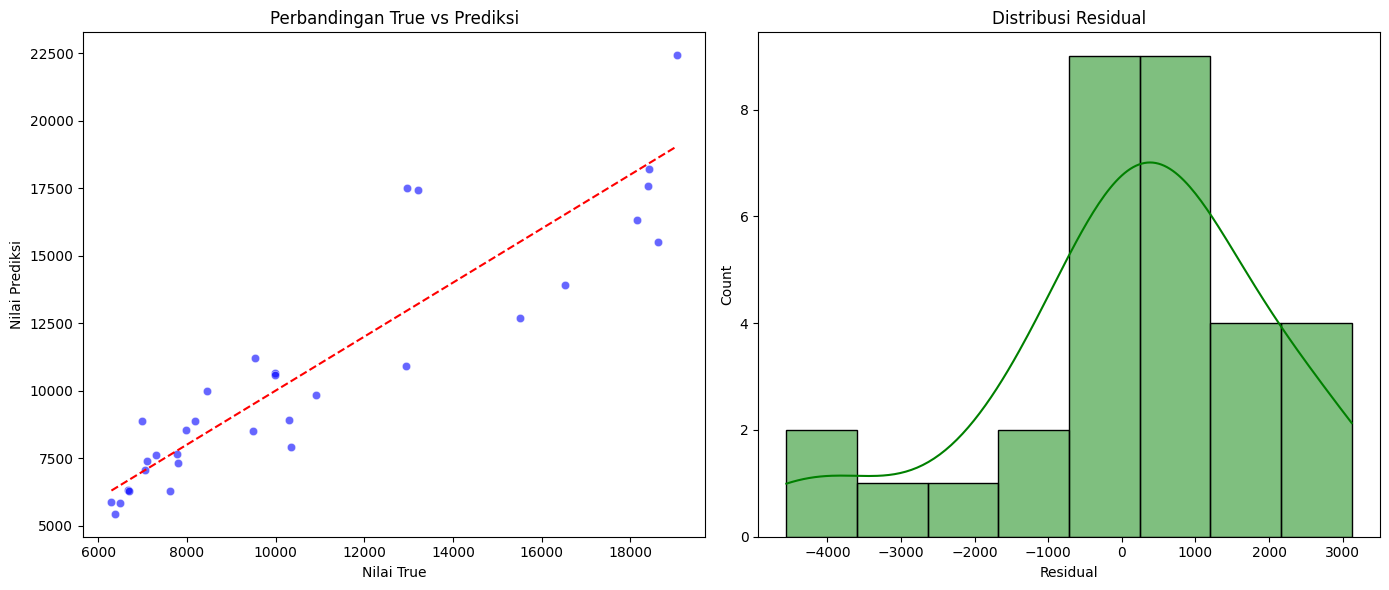

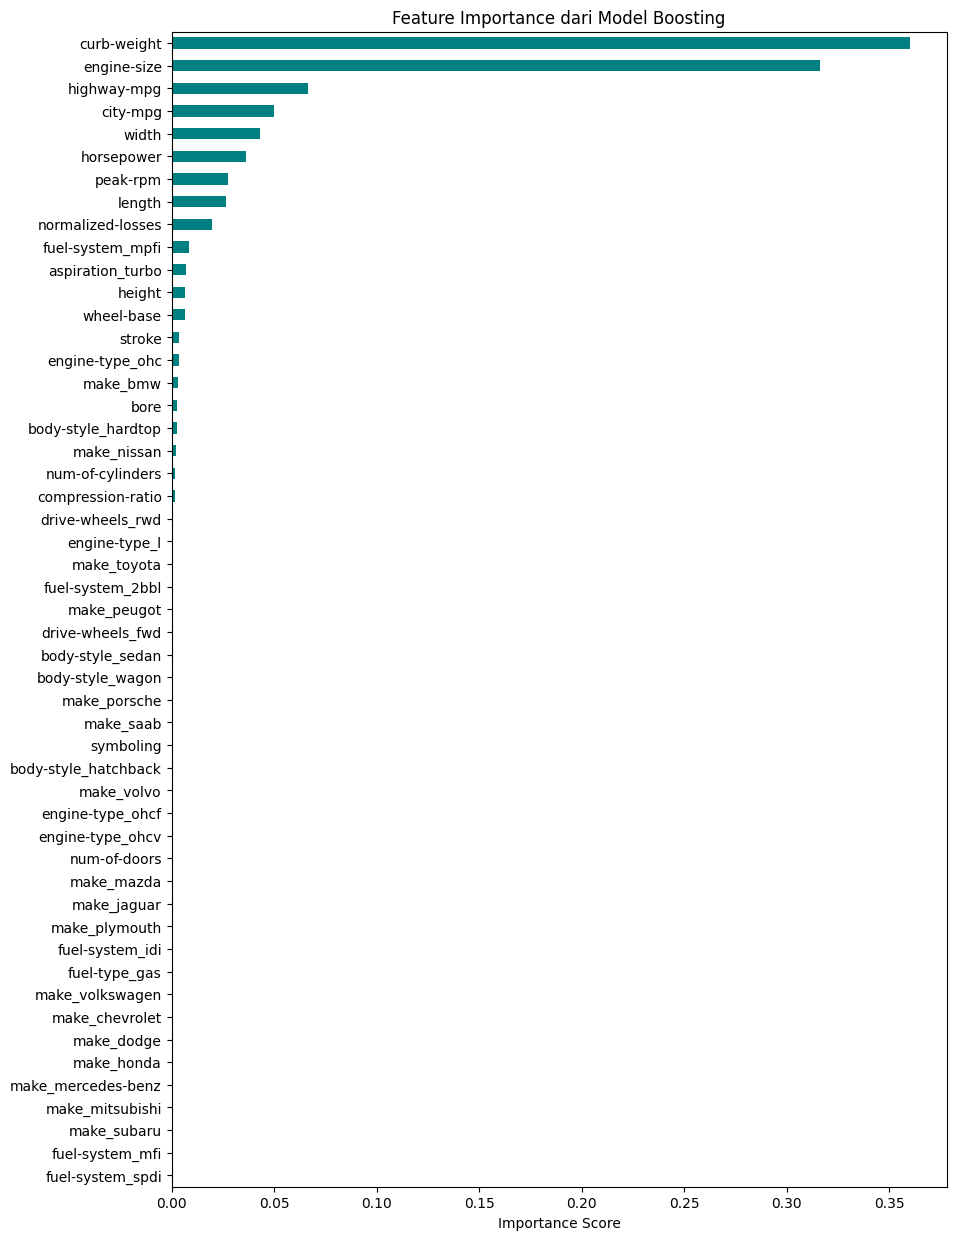


Hasil Evaluasi: {'MSE': 3339016.901939324, 'RMSE': np.float64(1827.2977047923318), 'R2': 0.8123581724855412}

Memproses Dataset: Infrared
Dataset loaded from https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv
Dimensi Dataset: (1020, 34)
Kolom yang tersedia: ['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance', 'T_offset1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHCC1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FH_Max1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1', 'aveOralM']
Evaluasi Model pada Data Testing:
MSE    : 0.0588
RMSE   : 0.2424
R²     : 0.7045


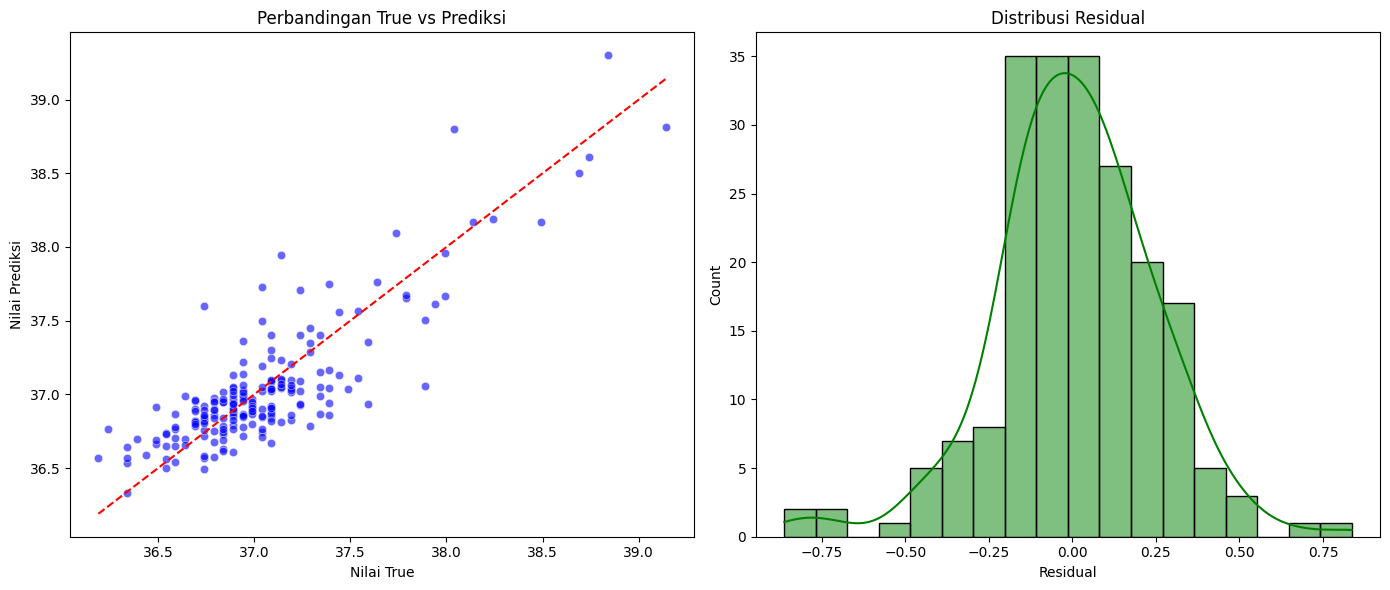

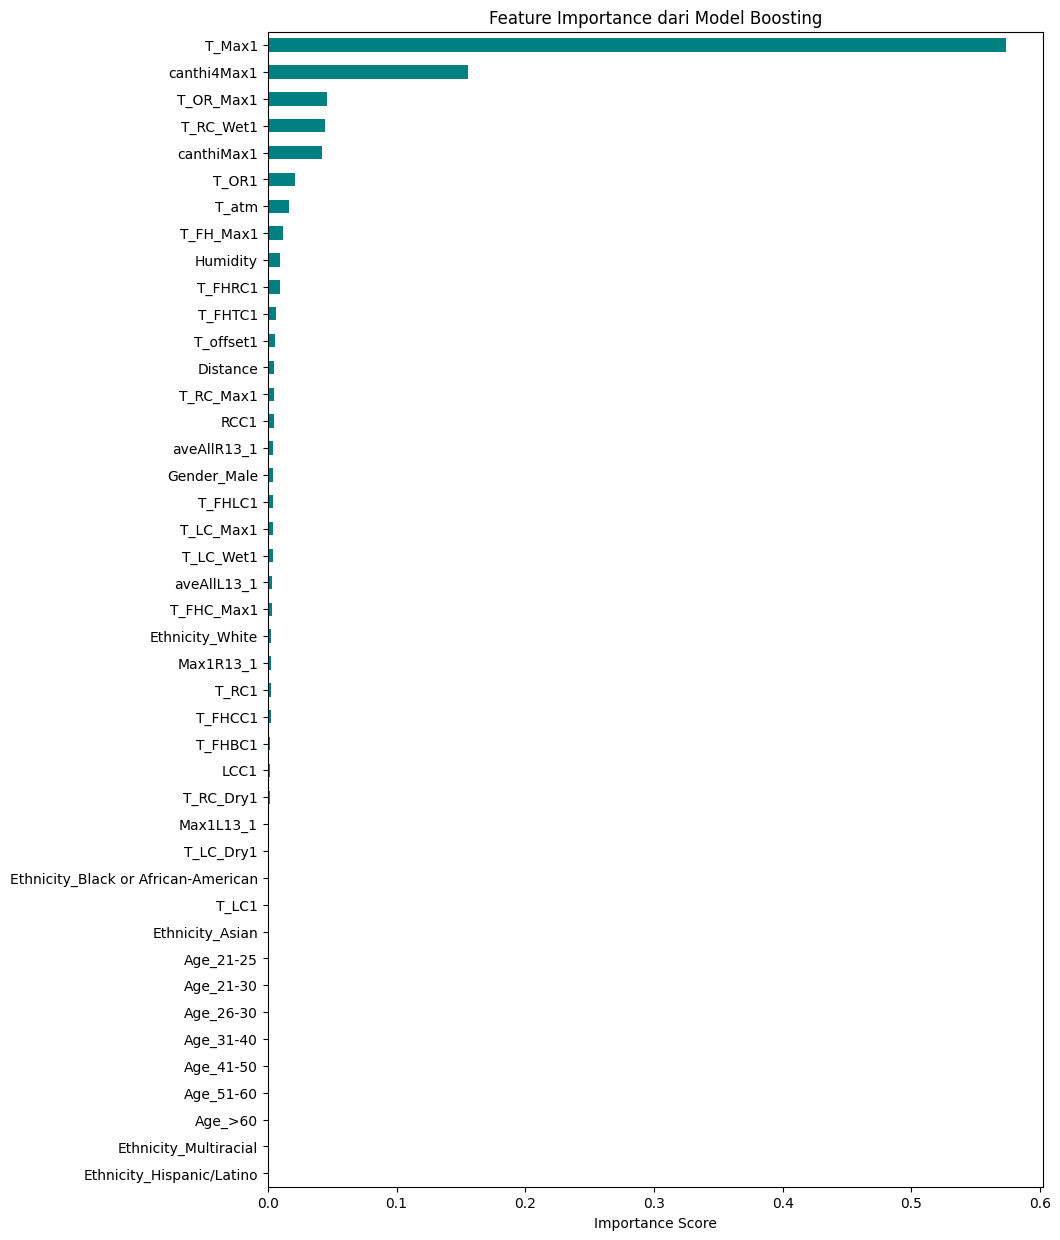


Hasil Evaluasi: {'MSE': 0.058776090409754775, 'RMSE': np.float64(0.2424378073027282), 'R2': 0.7045263074521939}

Memproses Dataset: BostonHousing
Dataset loaded from https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Dimensi Dataset: (506, 14)
Kolom yang tersedia: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
Evaluasi Model pada Data Testing:
MSE    : 6.2089
RMSE   : 2.4918
R²     : 0.9153


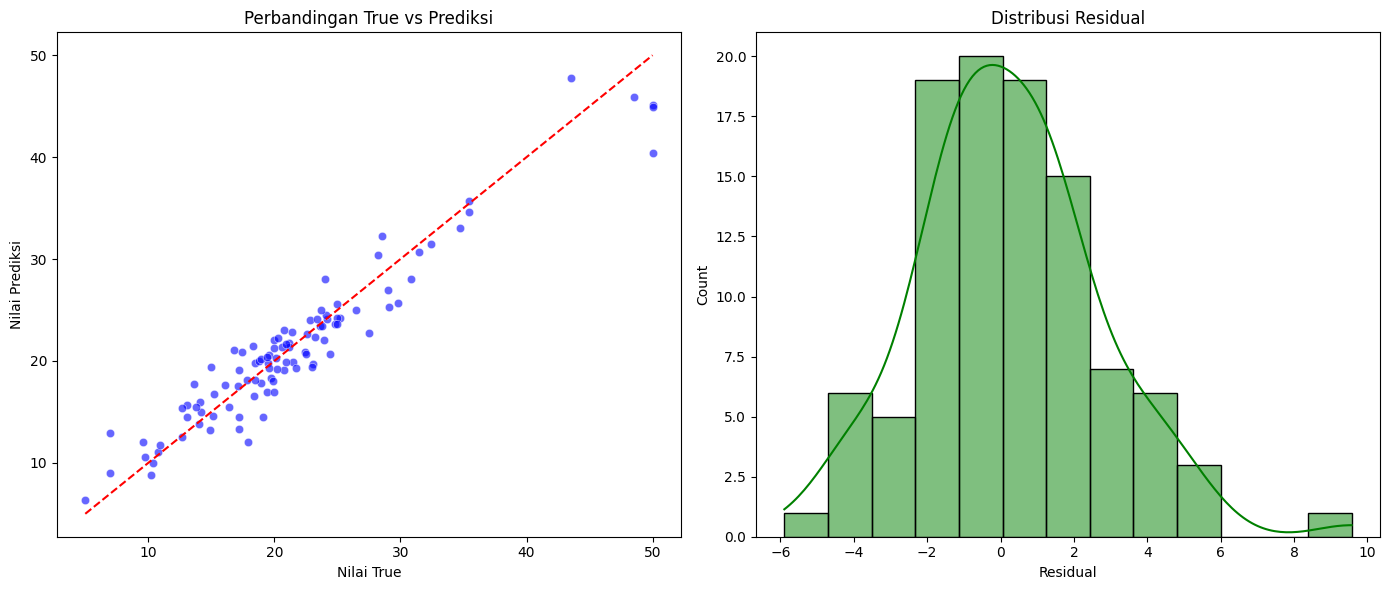

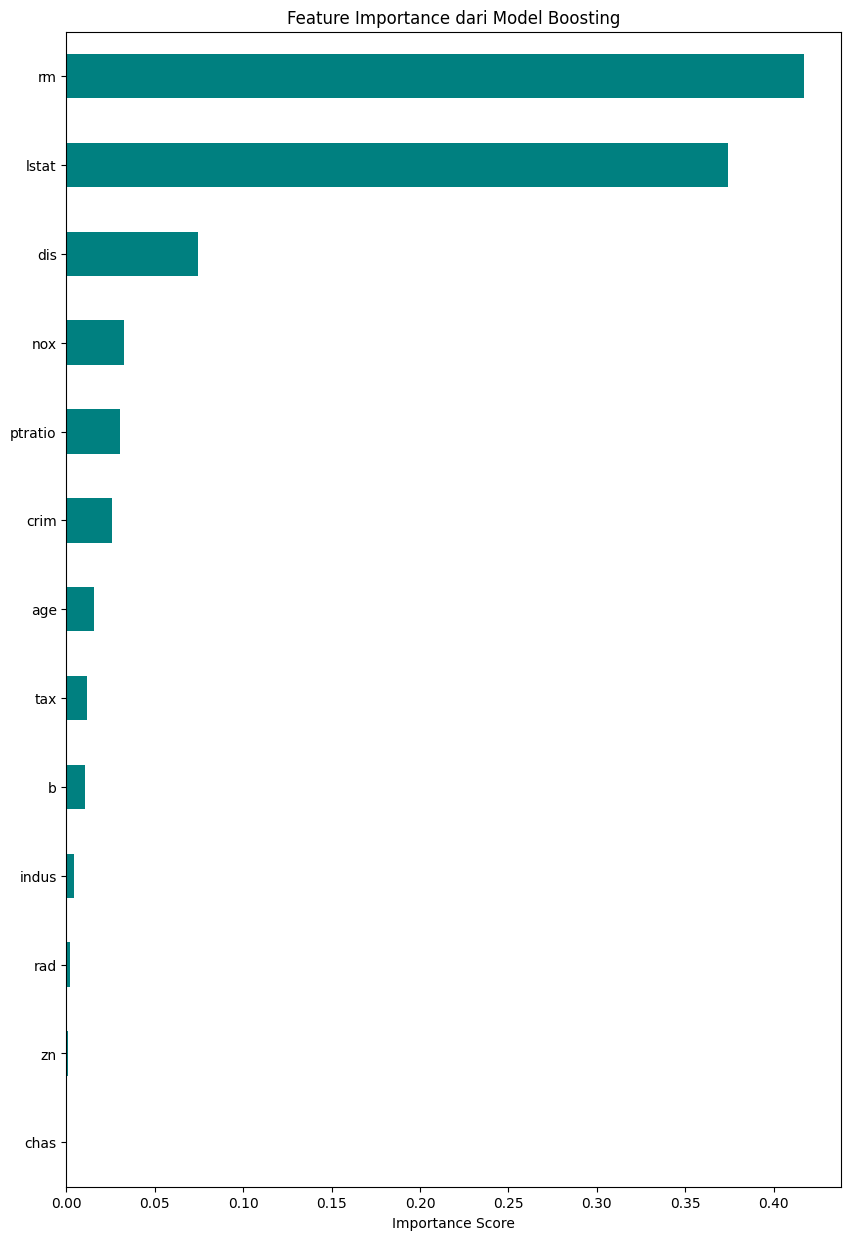


Hasil Evaluasi: {'MSE': 6.208861361528038, 'RMSE': np.float64(2.491758688462436), 'R2': 0.9153342280466539}


In [ ]:
datasets = {
    "Automobile": {
        "url": "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv",
        "target_col": "price"  # Sesuaikan jika perlu
    },
    "Infrared": {
        "url": "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv",
        "target_col": None  # Akan menggunakan kolom terakhir
    },
    "BostonHousing": {
        "url": "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv",
        "target_col": "medv"
    }
}

# Menyimpan hasil evaluasi tiap dataset
evaluasi_semua = {}

# Melakukan iterasi untuk tiap dataset dan menerapkan pipeline training-evaluasi
for ds_name, info in datasets.items():
    print("\n" + "="*60)
    print(f"Memproses Dataset: {ds_name}")
    print("="*60)

    # Memuat data dan menentukan fitur dan target
    df, X, y = load_dataset(info["url"], target_col=info["target_col"])

    # Melatih model boosting dan evaluasi
    eval_metrics = train_evaluate_boosting(X, y)
    evaluasi_semua[ds_name] = eval_metrics

    print("\nHasil Evaluasi:", eval_metrics)

#5. Ringkasan Hasil Evaluasi

In [ ]:
print("\n" + "="*60)
print("Ringkasan Evaluasi Model Boosting pada Semua Dataset")
print("="*60)
for ds_name, metrics in evaluasi_semua.items():
    print(f"\nDataset: {ds_name}")
    for metric, value in metrics.items():
        print(f"{metric} : {value:.4f}")


Ringkasan Evaluasi Model Boosting pada Semua Dataset

Dataset: Automobile
MSE : 3339016.9019
RMSE : 1827.2977
R2 : 0.8124

Dataset: Infrared
MSE : 0.0588
RMSE : 0.2424
R2 : 0.7045

Dataset: BostonHousing
MSE : 6.2089
RMSE : 2.4918
R2 : 0.9153


# Penjelasan Matematika Model Boosting dan Evaluasi Metrik

## A. Dasar-dasar Gradient Boosting

Gradient Boosting merupakan metode ensemble yang membangun model secara aditif:
$$
f(x) = f_0(x) + \sum_{m=1}^{M} \gamma_m h_m(x)
$$
dimana:
- $f_0(x)$ adalah prediksi awal, misalnya rata-rata dari target:
  $$
  f_0(x) = \frac{1}{n}\sum_{i=1}^{n} y_i
  $$
- $h_m(x)$ adalah model dasar (base learner), misalnya pohon keputusan, yang di-fit terhadap residual.
- $\gamma_m$ adalah koefisien (learning rate) untuk iterasi ke-$m$.

Pada setiap iterasi, dilakukan langkah-langkah berikut:
1. **Inisialisasi:**  
   Mulai dengan model awal $f_0(x)$.
2. **Komputasi Residual:**  
   Menghitung error atau residual sebagai turunan negatif dari fungsi loss. Untuk squared error:
   $$
   r_i^{(m)} = y_i - f_{m-1}(x_i)
   $$
3. **Fit Base Learner:**  
   Melatih $h_m(x)$ untuk memprediksi residual $r_i^{(m)}$.
4. **Update Model:**  
   Memperbarui prediksi:
   $$
   f_m(x) = f_{m-1}(x) + \eta h_m(x)
   $$
   dengan $\eta$ sebagai learning rate.

## B. Evaluasi Model: Metrik yang Digunakan

1. **Mean Squared Error (MSE):**
   $$
   \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
   $$
   Metrik ini mengukur rata-rata kuadrat selisih antara nilai aktual $y_i$ dan nilai prediksi $\hat{y}_i$.

2. **Root Mean Squared Error (RMSE):**
   $$
   \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
   $$
   RMSE memberikan error dalam satuan yang sama dengan target, sehingga lebih intuitif dipahami.

3. **Coefficient of Determination (\(R^2\)):**
   $$
   R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
   $$
   Di mana $\bar{y}$ adalah rata-rata dari $y_i$. Nilai $R^2$ menunjukkan proporsi variansi dalam target yang dapat dijelaskan oleh model.

Penjelasan dan rumus ini merupakan dasar untuk memahami bagaimana model boosting melakukan optimasi dan bagaimana performa model diukur menggunakan metrik evaluasi.
